<a href="https://colab.research.google.com/github/Benyapa-T/BSC_DPDM2025/blob/main/Ch5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

## load digits

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

print(f"shape of data: {X.shape}")
print(f"shape of target: {y.shape}")
print(f"Number of classes: {len(digits.target_names)}")
print(f"First target lables: {y[:5]}")

shape of data: (1797, 64)
shape of target: (1797,)
Number of classes: 10
First target lables: [0 1 2 3 4]


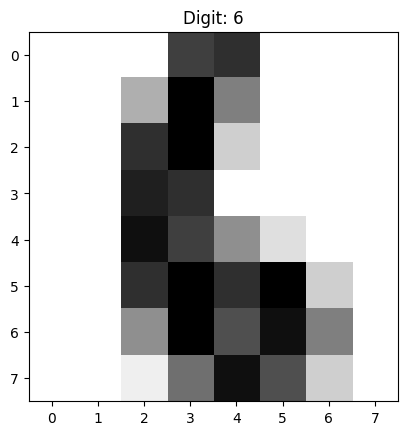

In [3]:
import matplotlib.pyplot as plt

# Get the first image and its target lable
first_image = X[6]
first_target = y[6]

# Resharpe the 64-feature vector to an 8*8 image
image_reshape = first_image.reshape(8, 8)

# Display the image
plt.imshow(image_reshape, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Digit: {first_target}")
plt.show()

## digits.data to DataFrame

In [4]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
import pandas as pd

df = pd.DataFrame(digits.data)
df['target'] = digits.target
print("DataFrame created successfully with shape:", df.shape)

DataFrame created successfully with shape: (1797, 65)


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
X.shape

(1797, 64)

In [8]:
X_train = X[:1700]
y_train = y[:1700]
X_test = X[1700:]
y_test = y[1700:]

# Model Contstruction
- import
- define (hyper-parameters)
- train (fitting)
- evaluate (train vs test)

## import

In [9]:
from sklearn.tree import DecisionTreeClassifier

## define

In [15]:
tree0 = DecisionTreeClassifier(random_state=6)

## Training

In [16]:
tree0.fit(X_train,y_train)

DecisionTreeClassifier(random_state=6)

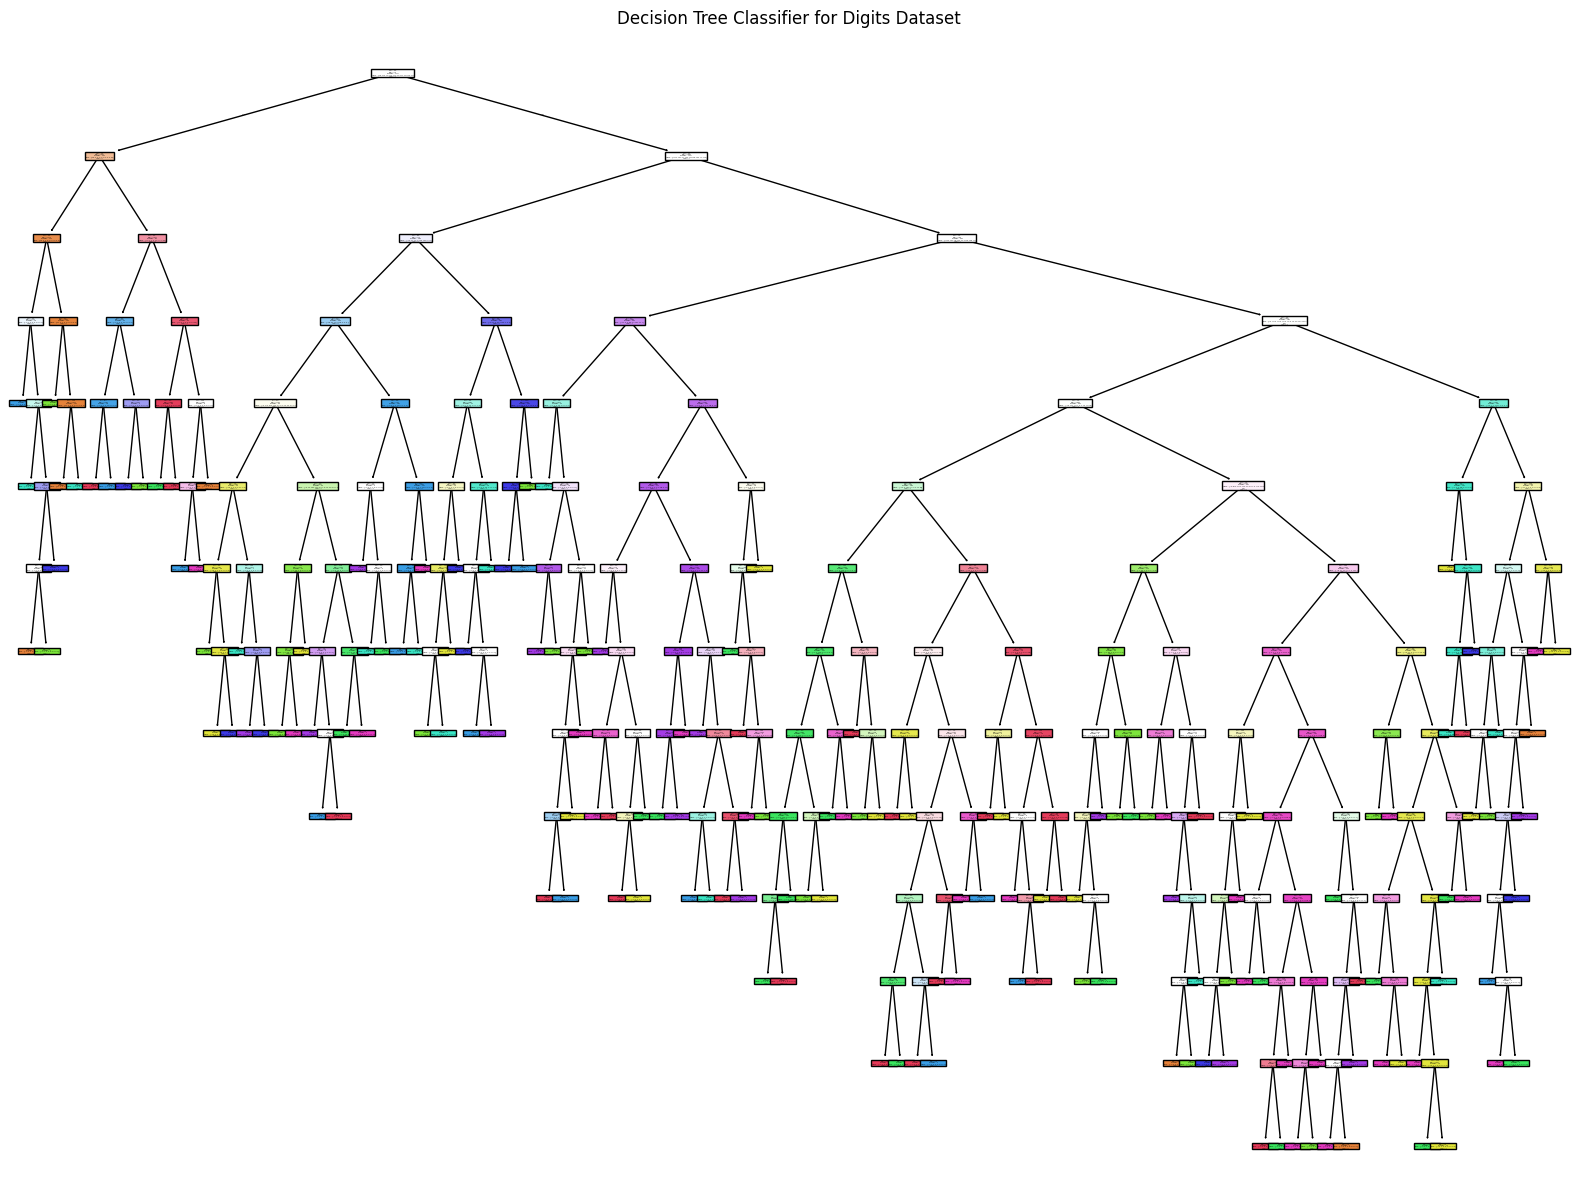

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 15)) # Adjust figure size for better readability
plot_tree(tree0, filled=True, feature_names=[str(i) for i in range(X.shape[1])], class_names=[str(i) for i in digits.target_names])
plt.title("Decision Tree Classifier for Digits Dataset")
plt.show()

## Evaluate

In [18]:
y_predict = tree0.predict(X_test)
y_predict

array([8, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 9, 5, 1, 0, 0, 6, 2, 7, 8, 2,
       0, 3, 8, 6, 8, 8, 7, 4, 3, 4, 6, 6, 6, 4, 9, 1, 9, 0, 9, 6, 7, 8,
       2, 0, 0, 6, 7, 6, 8, 2, 1, 7, 4, 6, 3, 1, 2, 9, 1, 7, 6, 8, 4, 8,
       1, 4, 0, 5, 5, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 5, 2, 2, 5, 7, 9, 4,
       4, 3, 3, 4, 9, 0, 8, 9, 8])

In [19]:
y_test

array([5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2,
       0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8,
       2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3,
       1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 8, 8, 4, 9, 0, 8, 9, 8])

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test, y_predict)

0.7938144329896907

## Pre-pruning (hyper-parameter tuning)

### Tree1

In [23]:
from sklearn.tree import DecisionTreeClassifier # import
tree1 = DecisionTreeClassifier(random_state=6, max_depth=3) # define
tree1.fit(X_train, y_train) # train

DecisionTreeClassifier(max_depth=3, random_state=6)

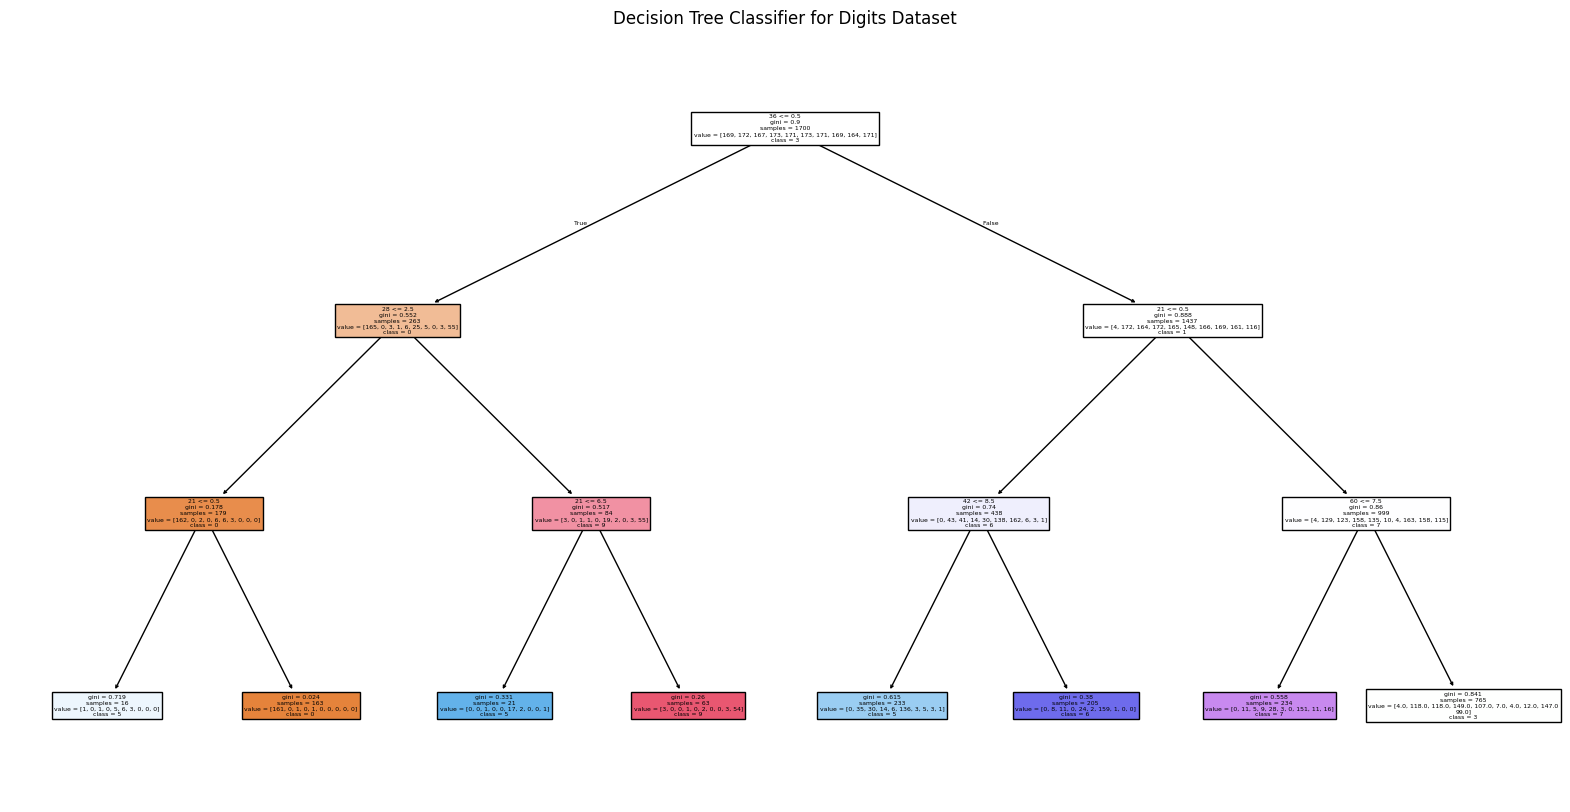

In [24]:
plt.figure(figsize=(20, 10)) # Adjust figure size for better readability
plot_tree(tree1, filled=True, feature_names=[str(i) for i in range(X.shape[1])], class_names=[str(i) for i in digits.target_names])
plt.title("Decision Tree Classifier for Digits Dataset")
plt.show()

In [25]:
y_predict = tree1.predict(X_test)
print(y_predict)
print(y_test)

[3 6 5 0 9 3 9 3 3 3 7 7 7 5 3 0 0 5 5 7 3 5 0 3 5 6 3 3 7 5 3 6 6 6 6 6 3
 3 7 0 3 6 7 3 3 0 0 3 7 6 3 3 3 7 3 6 3 3 3 3 3 7 6 3 3 3 3 5 0 5 3 6 3 6
 3 7 5 3 3 7 3 3 5 5 5 7 3 5 3 3 3 3 3 0 3 3 3]
[5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6
 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8]


In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.4639175257731959

### Tree2

In [32]:
from sklearn.tree import DecisionTreeClassifier # import
tree2 = DecisionTreeClassifier(random_state=6, max_depth=7) # define
tree2.fit(X_train, y_train) # train
y_predict2 = tree2.predict(X_test)
accuracy_score(y_test, y_predict2)

0.7938144329896907

### Quiz11

accuracy_score > 0.7938144329896907

Tree3

In [44]:
from sklearn.tree import DecisionTreeClassifier # import
tree3 = DecisionTreeClassifier(random_state=6, max_depth=9, min_samples_leaf=5, min_samples_split=10, criterion='entropy') # define
tree3.fit(X_train, y_train) # train
y_predict3 = tree3.predict(X_test)
accuracy_score(y_test, y_predict3)

0.8762886597938144